# Linear Regression

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn import datasets

In [26]:
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

In [27]:
# train, test 분리
X_train, X_test, y_train, y_test = train_test_split(diabetes_X, diabetes_y, test_size = 0.2, random_state = 42)

In [28]:
# 모델 학습
model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

In [29]:
# 테스트 데이터 예측
y_pred = model.predict(X_test)
# 평균 제곱 오차 계산
mse = mean_squared_error(y_test, y_pred)

In [30]:
mse

2900.1936284934804

# SVM(Support Vector Machine)

In [31]:
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [32]:
iris = datasets.load_iris()

In [33]:
X = iris.data
y = iris.target

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 30)

In [35]:
model = SVC()

model.fit(X_train, y_train)

SVC()

In [36]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

In [37]:
import matplotlib.pyplot as plt

ValueError: X has 2 features, but SVC is expecting 4 features as input.

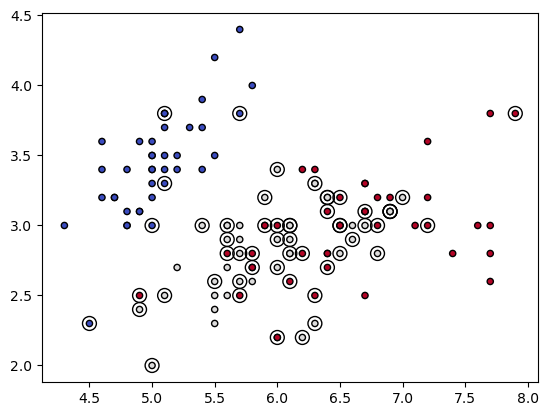

In [38]:
# 모델의 서포트 벡터 표시
plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100, facecolors='none', edgecolors='k', marker='o')

# 데이터 포인트 표시
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.coolwarm, s=20, edgecolors='k')

# 결정 경계 그리기
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# 모델의 결정 함수를 사용하여 그리드 생성
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50), np.linspace(ylim[0], ylim[1], 50))
Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# 결정 경계와 마진 그리기
plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('SVM Decision Boundary with Support Vectors')
plt.show()

In [ ]:
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Iris 데이터 로드 및 처음 두 특성만 사용
iris = datasets.load_iris()
X = iris.data[:, :2]  # 처음 두 특성만 사용
y = iris.target

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=30)

# 모델 생성 및 학습
model = SVC(kernel='linear')
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 정확도 계산
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8260869565217391


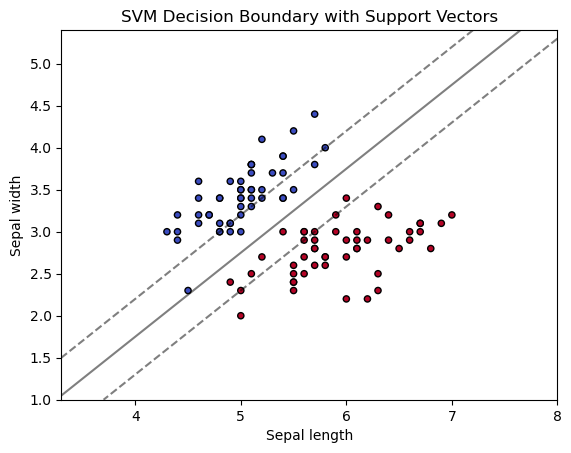

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

# Iris 데이터 로드 및 처음 두 클래스만 사용
iris = datasets.load_iris()
X = iris.data[iris.target != 2, :2]  # 처음 두 특성과 처음 두 클래스만 사용
y = iris.target[iris.target != 2]

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 모델 학습
model = SVC(kernel='linear')
model.fit(X_train, y_train)

# 결정 경계 시각화를 위한 그리드 생성
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 50), np.linspace(y_min, y_max, 50))

# 결정 함수로부터 결정 경계 시각화
Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')

plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('SVM Decision Boundary with Support Vectors')
plt.show()


Accuracy: 1.0


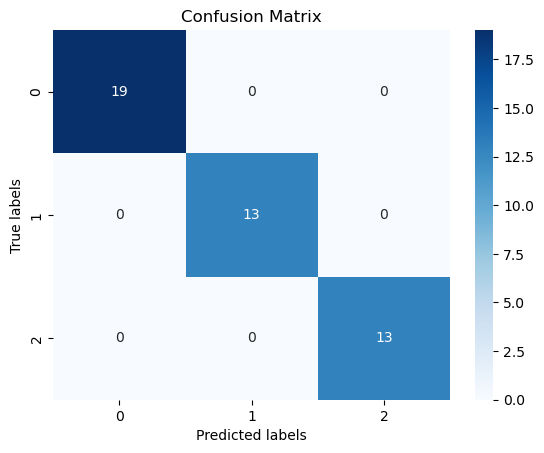

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns

# Iris 데이터 로드
iris = datasets.load_iris()
X = iris.data  # 모든 특성 사용
y = iris.target

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 모델 학습
model = SVC(kernel='linear')
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 정확도 계산
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# 혼동 행렬 시각화
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



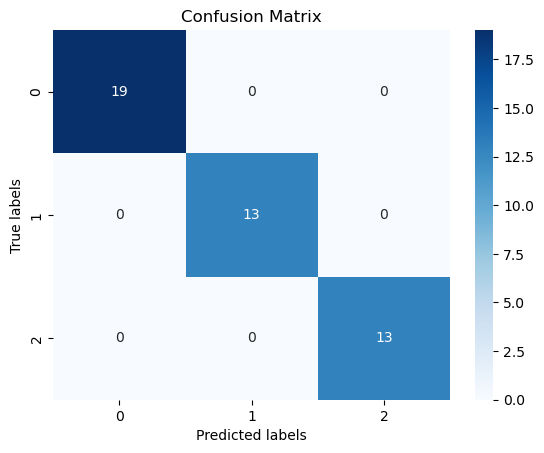

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# 데이터 로드
iris = datasets.load_iris()
X = iris.data
y = iris.target

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# RBF 커널을 사용한 SVM 모델 학습
model = SVC(kernel='rbf')
model.fit(X_train, y_train)

# 예측 및 성능 평가
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# 혼동 행렬 시각화
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


# SVM RBF

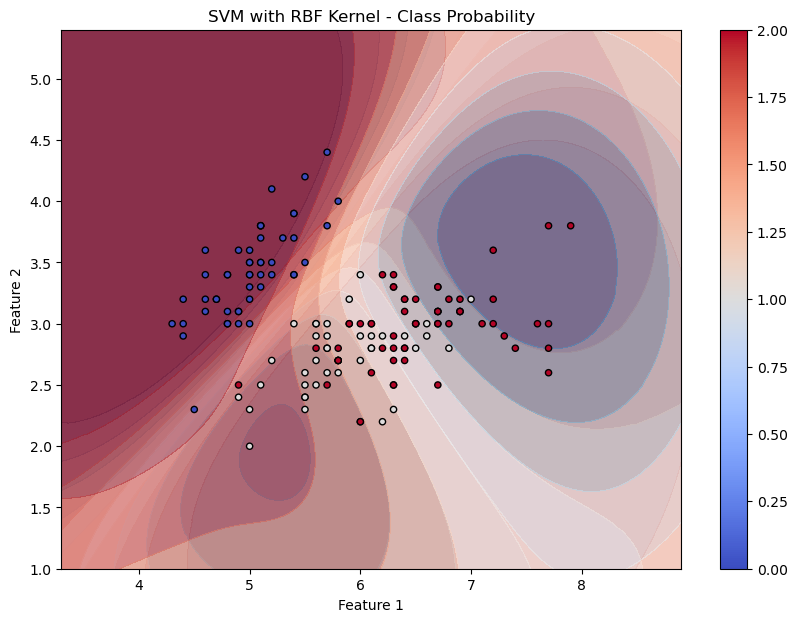

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

# Iris 데이터 로드 및 2개의 특성만 사용
iris = datasets.load_iris()
X = iris.data[:, :2]  # 처음 두 특성 사용
y = iris.target

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# RBF 커널을 사용한 SVM 모델 생성 및 학습
model = SVC(kernel='rbf', probability=True)
model.fit(X_train, y_train)

# 격자 생성
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500), np.linspace(y_min, y_max, 500))

# 모델의 확률 예측
probas = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])
probas = probas.reshape(xx.shape + (3,))

# 클래스 별 확률 밀도 플롯
plt.figure(figsize=(10, 7))
for i in range(3):
    plt.contourf(xx, yy, probas[:, :, i], alpha=0.5, levels=np.linspace(0, 1, 11), cmap=plt.cm.RdBu)

# 데이터 포인트 플롯
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('SVM with RBF Kernel - Class Probability')
plt.colorbar()
plt.show()

C:\Users\BIG3-013\AppData\Local\Temp\ipykernel_13104\3626833709.py:30: UserWarning: The following kwargs were not used by contour: 'label'
  contour = plt.contourf(xx, yy, np.max(probas, axis=2), alpha=0.5, levels=np.linspace(0, 1, 11), cmap=plt.cm.RdBu, label='Predicted class probability')


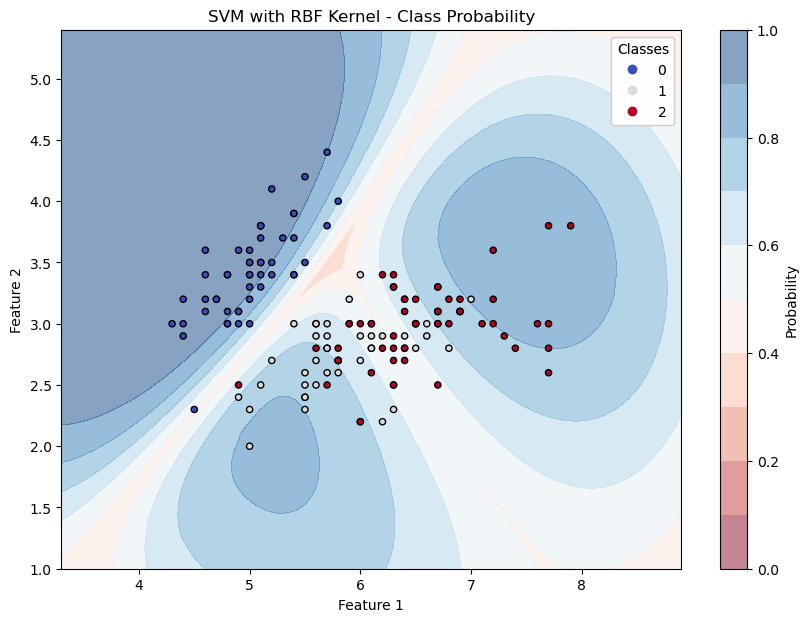

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

# Iris 데이터 로드 및 2개의 특성만 사용
iris = datasets.load_iris()
X = iris.data[:, :2]  # 처음 두 특성 사용
y = iris.target

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# RBF 커널을 사용한 SVM 모델 생성 및 학습
model = SVC(kernel='rbf', probability=True)
model.fit(X_train, y_train)

# 격자 생성
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500), np.linspace(y_min, y_max, 500))

# 모델의 확률 예측
probas = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])
probas = probas.reshape(xx.shape + (3,))

# 클래스 별 확률 밀도 플롯
plt.figure(figsize=(10, 7))
contour = plt.contourf(xx, yy, np.max(probas, axis=2), alpha=0.5, levels=np.linspace(0, 1, 11), cmap=plt.cm.RdBu, label='Predicted class probability')
plt.colorbar(contour, label='Probability')

# 데이터 포인트 플롯
scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k', label='Data points')
legend1 = plt.legend(*scatter.legend_elements(), title="Classes")
plt.gca().add_artist(legend1)

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('SVM with RBF Kernel - Class Probability')
plt.show()

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 데이터 로드
iris = load_iris()
X = iris.data
y = iris.target

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 랜덤 포레스트 모델 생성 및 학습
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# 예측
y_pred = rf.predict(X_test)

# 정확도 계산
accuracy = accuracy_score(y_test, y_pred)
print("Random Forest Model Accuracy:", accuracy)

Random Forest Model Accuracy: 1.0


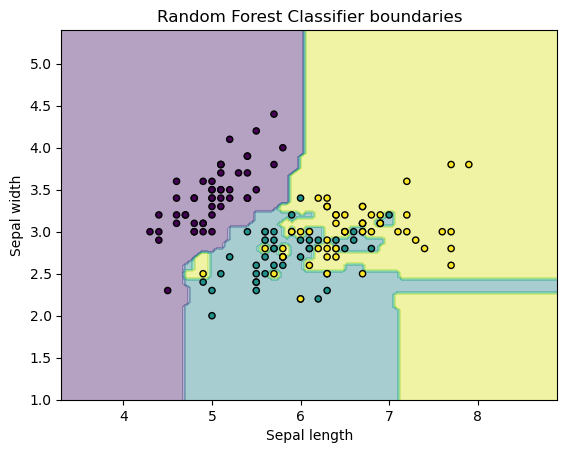

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Iris 데이터 로드 및 처음 두 특성만 사용
iris = datasets.load_iris()
X = iris.data[:, :2]  # 처음 두 특성 사용
y = iris.target

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 랜덤 포레스트 모델 생성 및 학습
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# 격자 생성
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

# 모델의 예측 결정
Z = rf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# 결정 경계 시각화
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Random Forest Classifier boundaries')
plt.show()

AttributeError: 'LinearSegmentedColormap' object has no attribute 'colors'

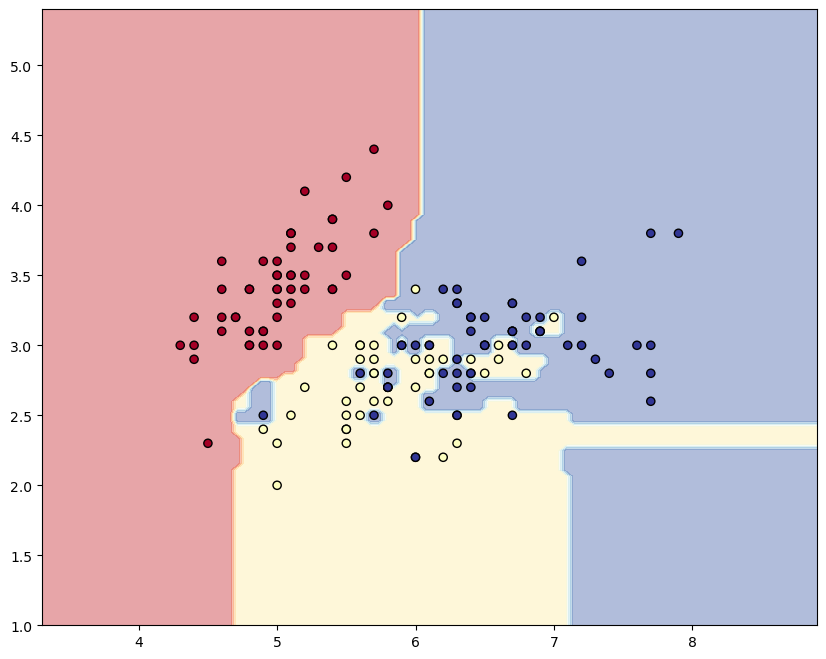

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# 데이터 로드 및 분할
iris = datasets.load_iris()
X = iris.data[:, :2]  # 처음 두 특성 사용
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 랜덤 포레스트 모델 생성 및 학습
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# 격자 생성
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

# 모델의 예측 결정
Z = rf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# 결정 경계 시각화
plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.RdYlBu)
scatter = plt.scatter(X[:, 0], X[:, 1], c=y, s=35, edgecolor='k', cmap=plt.cm.RdYlBu)

# 범례 추가
classes = ['Setosa', 'Versicolor', 'Virginica']
colors = [plt.cm.RdYlBu.colors[i] for i in [0, 128, 255]]
patches = [plt.Line2D([0], [0], marker='o', color='w', label=classes[i],
                      markersize=10, markerfacecolor=colors[i]) for i in range(len(classes))]
plt.legend(handles=patches, title="Classes")

# 축 레이블 및 타이틀 추가
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Decision Boundaries of Random Forest Classifier')

# 컬러바 추가
cbar = plt.colorbar(scatter, fraction=0.03, pad=0.04)
cbar.set_label('Class label')

# 그래프 표시
plt.show()

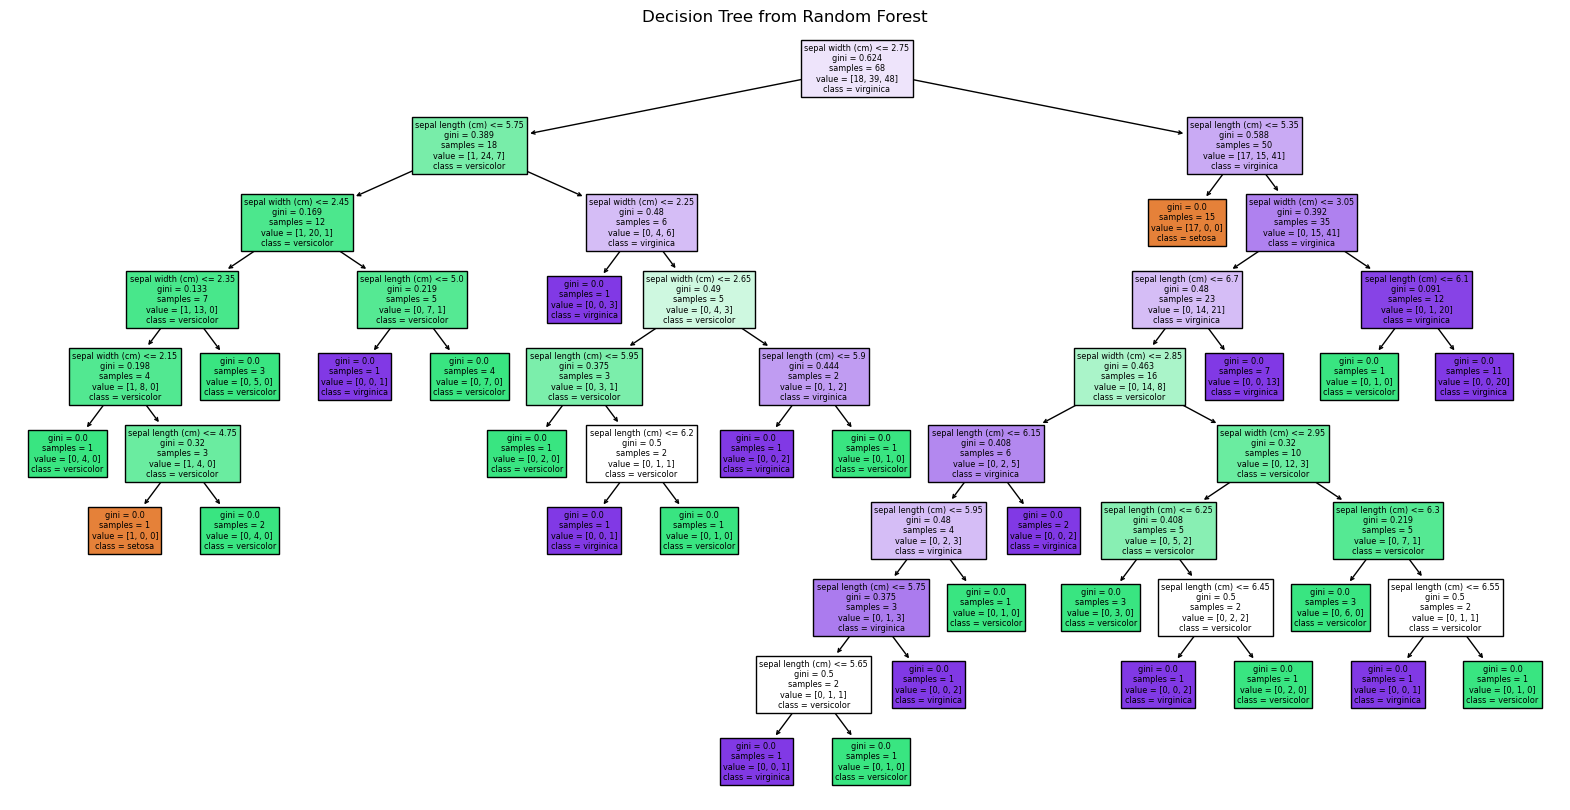

In [ ]:
from sklearn import tree

# 랜덤 포레스트 모델 생성 및 학습 (앞서의 코드 사용)
# ...

# 첫 번째 결정 트리 시각화
plt.figure(figsize=(20,10))
tree.plot_tree(rf.estimators_[0], filled=True, feature_names=iris.feature_names, class_names=iris.target_names)
plt.title('Decision Tree from Random Forest')
plt.show()


# KNN(K-Nearest Neighbor)

In [ ]:
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
iris = datasets.load_iris()

X = iris.data
y = iris.target

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 24)

model = KNeighborsClassifier(n_neighbors = 9)  # k값 설정

model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=9)

In [ ]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8333333333333334

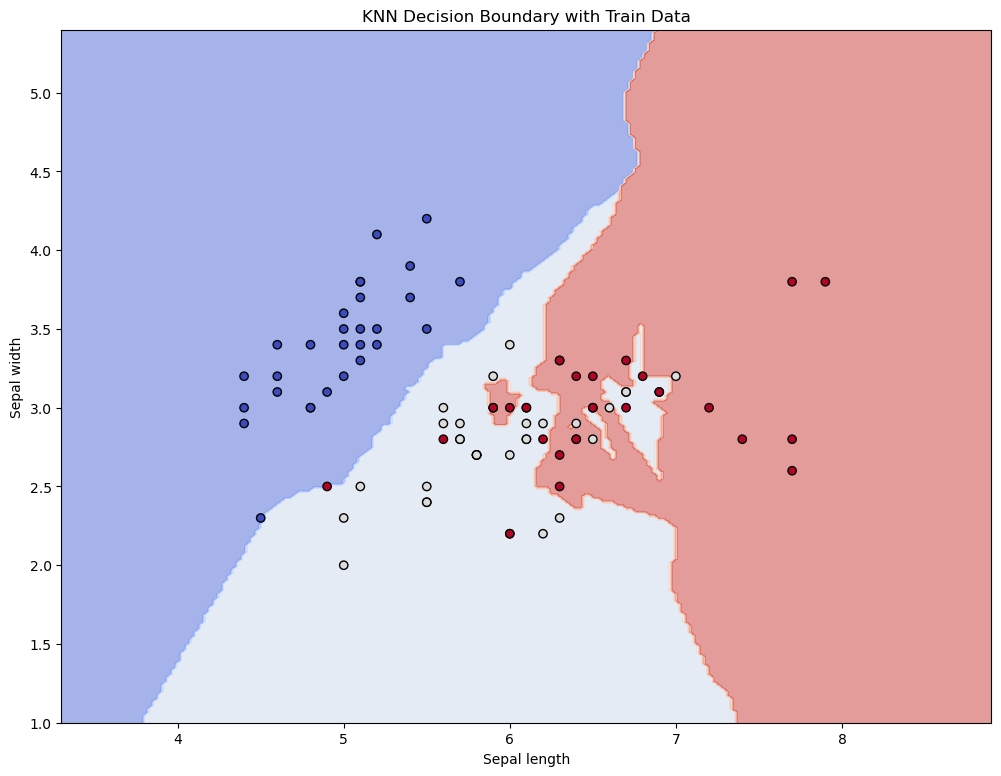

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Iris 데이터 로드 및 처음 두 특성만 사용
iris = datasets.load_iris()
X = iris.data[:, :2]  # 처음 두 특성 사용
y = iris.target

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=24)

# KNN 모델 생성 및 학습
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)

# 격자 생성
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))

# 모델의 예측 결정
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# 결정 경계 시각화
plt.figure(figsize=(12, 9))
plt.contourf(xx, yy, Z, alpha=0.5, cmap=plt.cm.coolwarm)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolor='k', cmap=plt.cm.coolwarm)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('KNN Decision Boundary with Train Data')
plt.show()

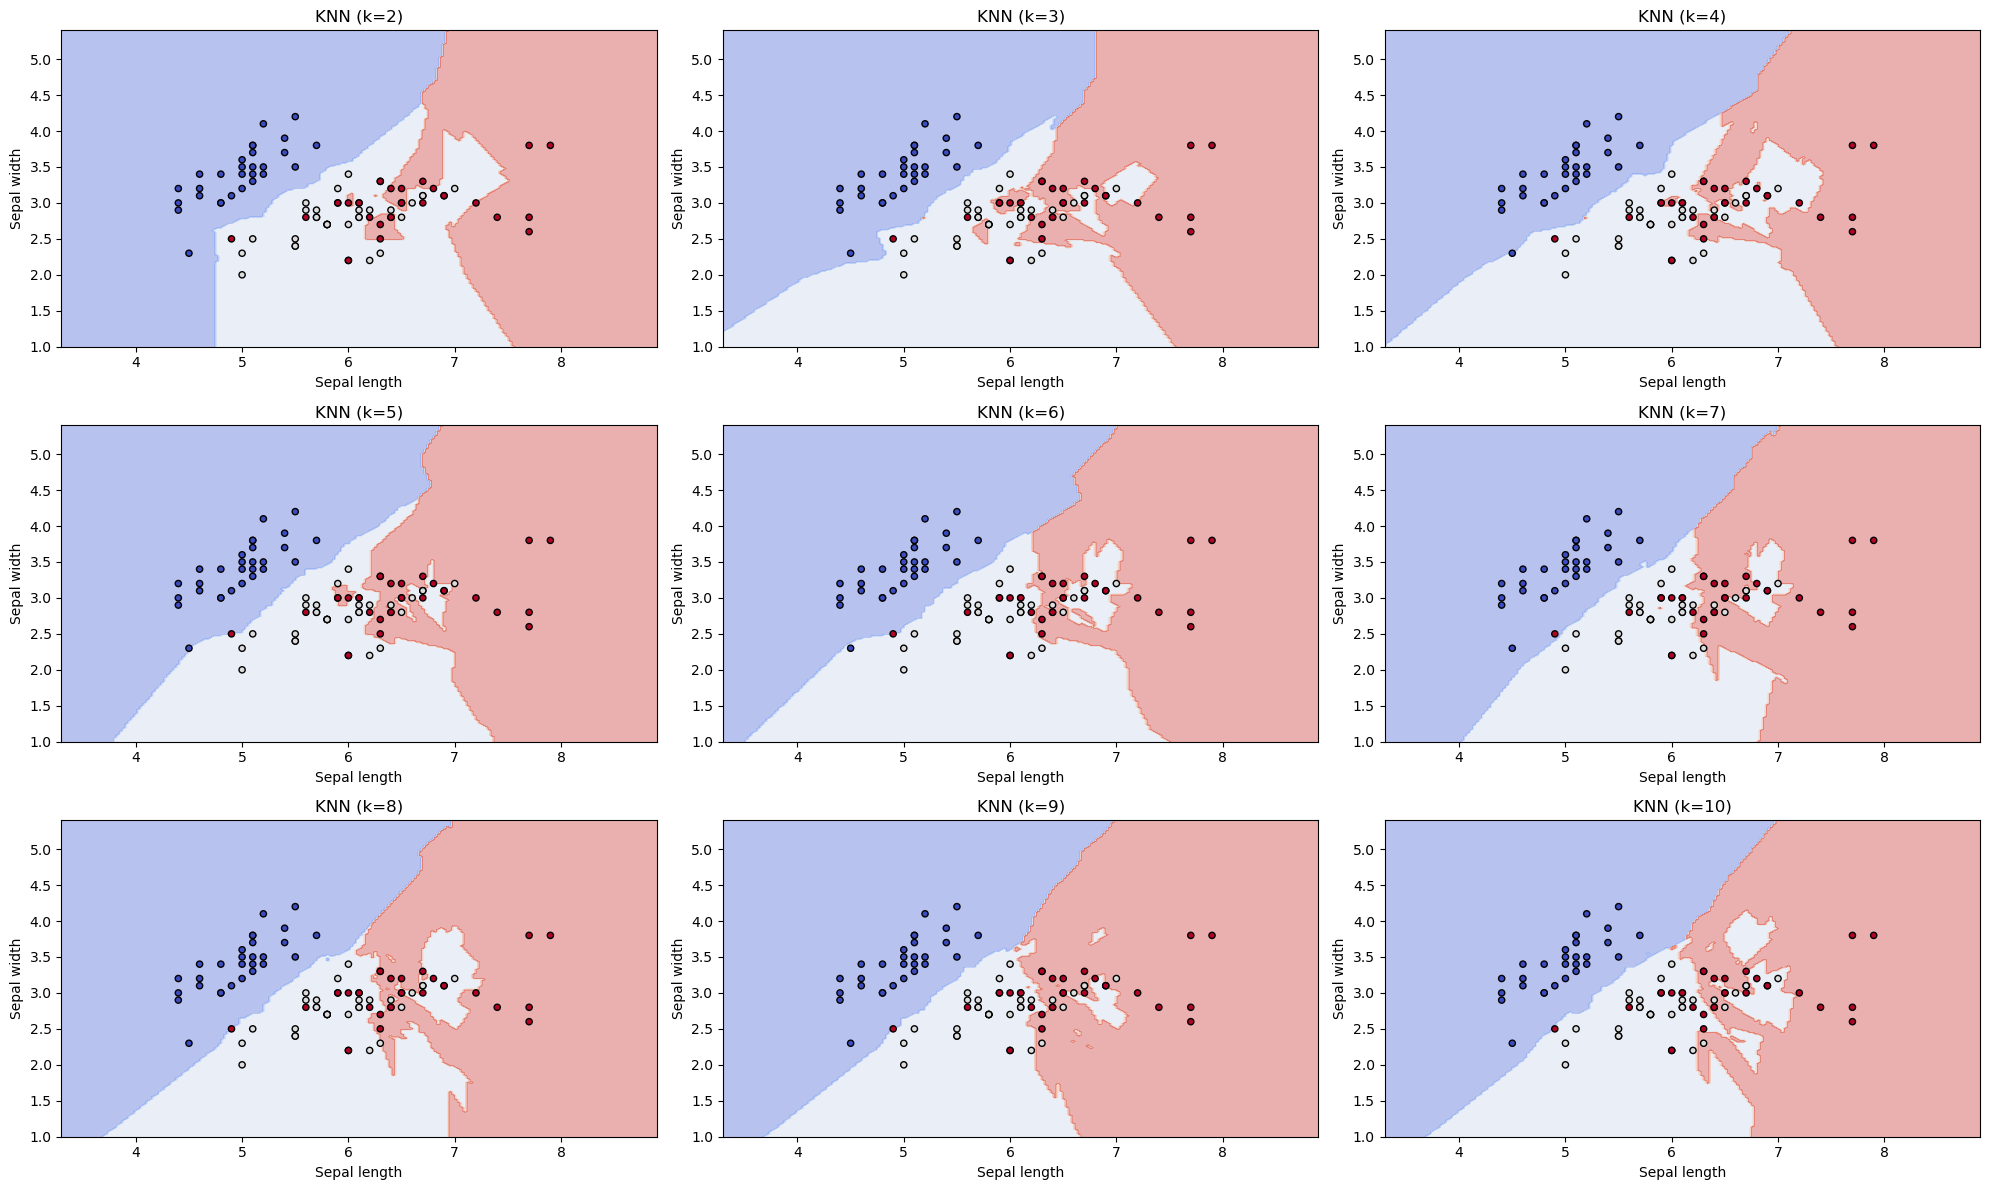

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Iris 데이터 로드 및 처음 두 특성만 사용
iris = datasets.load_iris()
X = iris.data[:, :2]
y = iris.target

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=24)

# k 값의 범위
k_values = [2, 3, 4, 5, 6, 7, 8, 9, 10]

# 그래프 그리기
plt.figure(figsize=(20, 12))
for i, k in enumerate(k_values, 1):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    # 격자 생성
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))
    
    # 격자 위에서 예측
    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # 서브플롯에 결정 경계 그리기
    plt.subplot(3, 3, i)
    plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.coolwarm)
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=20, edgecolor='k', cmap=plt.cm.coolwarm)
    plt.title(f'KNN (k={k})')
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')

plt.tight_layout()
plt.show()

# 에이다부스트(AdaBoost)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
model = AdaBoostClassifier()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print(accuracy)

0.6666666666666666


Accuracy: 0.6666666666666666


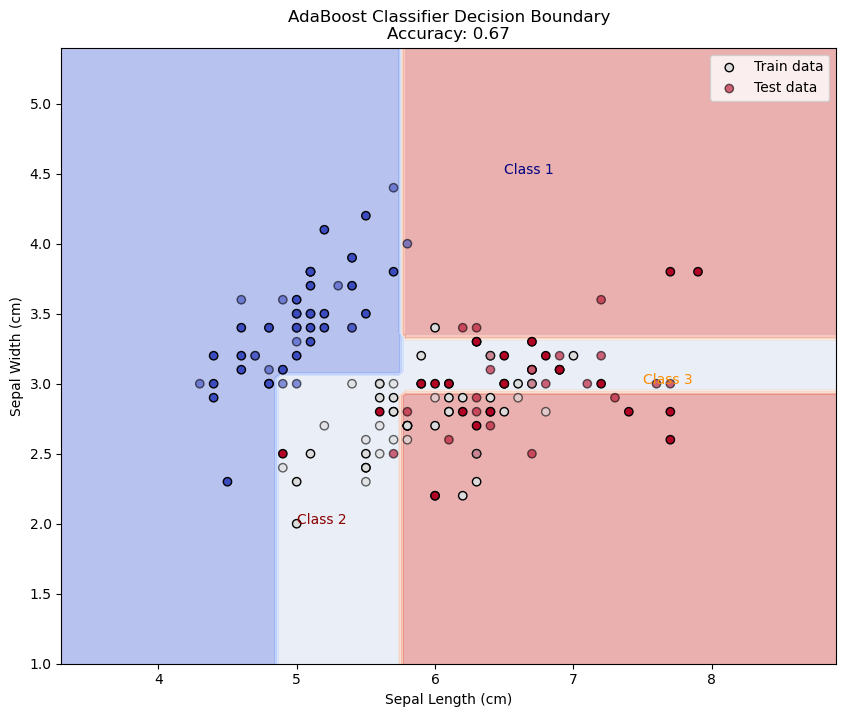

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

# 데이터 로드 및 분할
iris = load_iris()
X = iris.data[:, :2]  # 처음 두 특성 사용
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=24)

# AdaBoost 모델 생성 및 학습
model = AdaBoostClassifier()
model.fit(X_train, y_train)

# 예측 및 정확도 계산
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# 격자 생성
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

# 격자 위에서 예측
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# 시각화
plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.coolwarm)

# 훈련 데이터와 테스트 데이터를 플롯에 추가
train_scatter = plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolor='k', cmap=plt.cm.coolwarm, label='Train data')
test_scatter = plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolor='k', alpha=0.6, cmap=plt.cm.coolwarm, label='Test data')

# 범례 추가
plt.legend(loc='upper right')

# 축 레이블 및 타이틀 추가
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title(f'AdaBoost Classifier Decision Boundary\nAccuracy: {accuracy:.2f}')

# 결정 경계와 클래스 영역에 대한 설명 추가
plt.text(6.5, 4.5, 'Class 1', color='navy')
plt.text(5.0, 2.0, 'Class 2', color='darkred')
plt.text(7.5, 3.0, 'Class 3', color='darkorange')

plt.show()
